In [11]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float32
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float32
 6   MentalHealth      319795 non-null  float32
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   Diabetic          319795 non-null  float64
 10  PhysicalActivity  319795 non-null  int64  
 11  SleepTime         319795 non-null  float32
 12  Asthma            319795 non-null  int64  
 13  KidneyDisease     319795 non-null  int64  
 14  SkinCancer        319795 non-null  int64  
dtypes: float32(4), float64(1), int64(10)
memory usage: 31.7 MB


In [14]:
I = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in I:
    df[i] = df[i].astype('float32')

In [15]:
df = df.drop('Race',axis = 1)

In [16]:
b = ['AlcoholDrinking','Smoking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer','HeartDisease']
for i in b:
    df[i] = df[i].map({'No':0,'Yes':1})

In [17]:
df['Sex'] = df['Sex'].map({'Female':0,'Male':1})

In [18]:
df = df.drop(['AgeCategory','GenHealth'],axis = 1)

In [20]:
x = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in x:
    df[i] = df[i].div(100).round(2)

In [21]:
df.replace({np.inf: 1, np.nan : 0}, inplace=True)

In [23]:
l = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
for i in l:
    df[i] = df[i].astype('int32')

In [25]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


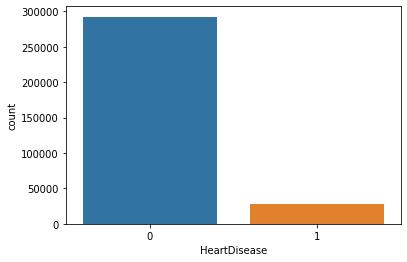

In [34]:
sns.countplot(df['HeartDisease'])

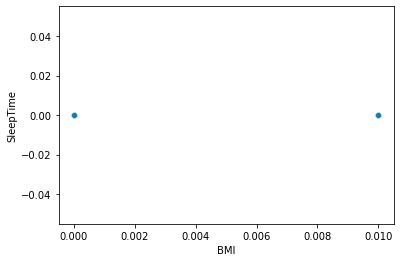

In [35]:
sns.scatterplot(data = df, x = 'BMI', y = 'SleepTime')

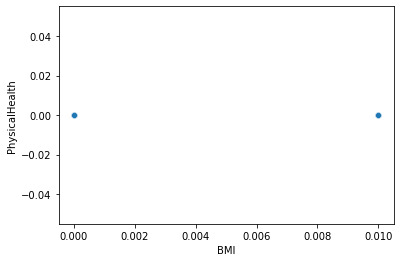

In [36]:
sns.scatterplot(data = df, x = 'BMI', y = 'PhysicalHealth')

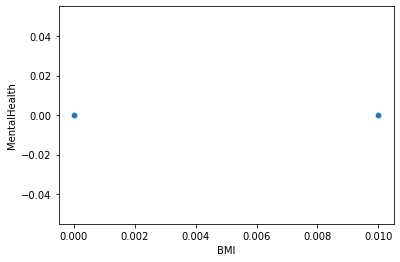

In [37]:
sns.scatterplot(data = df, x = 'BMI', y = 'MentalHealth')

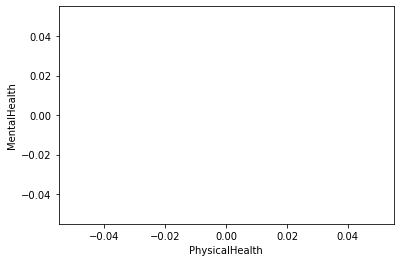

In [38]:
sns.lineplot(data = df, x = 'PhysicalHealth', y = 'MentalHealth')

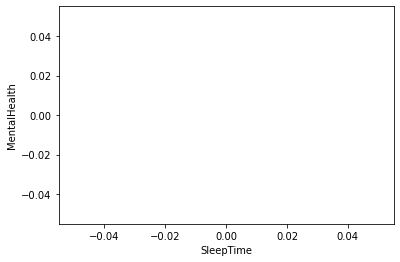

In [39]:
sns.lineplot(data = df, x = 'SleepTime', y = 'MentalHealth')

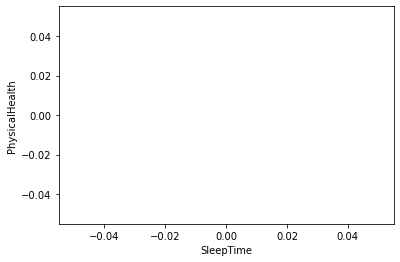

In [40]:
sns.lineplot(data = df, x = 'SleepTime', y = 'PhysicalHealth')

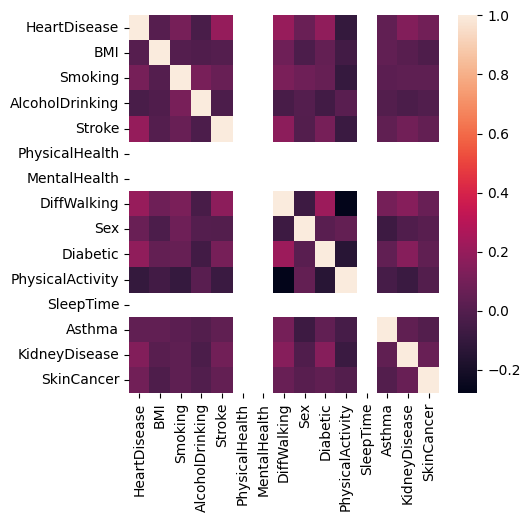

In [43]:
plt.figure(figsize = (5,5), dpi = 100)
sns.heatmap(df.corr())

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [31]:
MAE

0.14064255091744698

In [32]:
MSE

0.07030460027807038

In [33]:
RMSE

0.26515014666801595